[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kuldeep/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


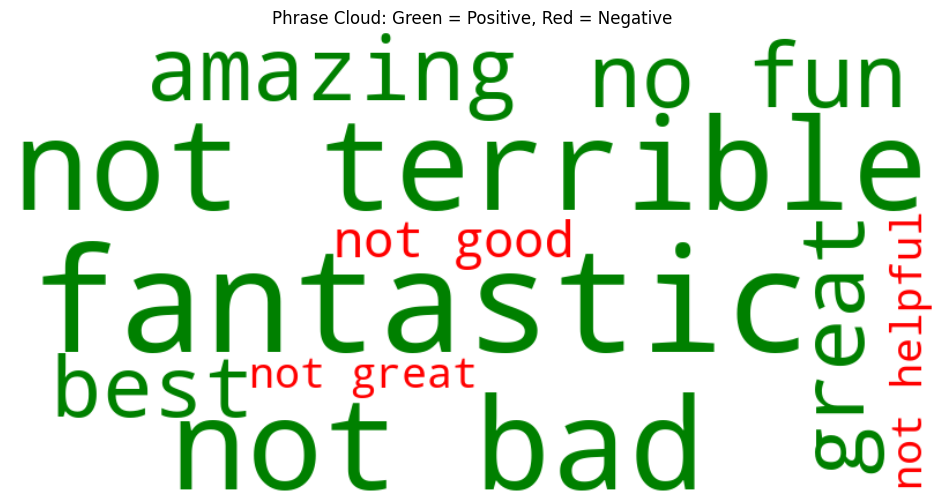


Top 5 Positive Phrases:
fantastic: 0.5574
not terrible: 0.3724
not bad: 0.431
amazing: 0.5859
great: 0.6249

Top 5 Positive Phrases:
not good: -0.3412
not great: -0.5096
not helpful: -0.3252


In [73]:
# # from nltk.tokenize import RegexpTokenizer
# # from nltk.util import ngrams
# # from collections import Counter
# # from textblob import TextBlob
# # from wordcloud import WordCloud
# # import matplotlib.pyplot as plt

# # # 1) Your raw data: list of sentences
# # sentences = [
# #     "This movie is not good at all",
# #     "I had a fantastic time",
# #     "The service was not terrible, but not great either",
# #     "It was an awful experience"
# # ]

# # # 2) Build unigram & bigram frequencies with a regex tokenizer
# # tokenizer = RegexpTokenizer(r"\w+")
# # unigram_counts = Counter()
# # bigram_counts  = Counter()

# # for sent in sentences:
# #     tokens = tokenizer.tokenize(sent.lower())
# #     unigram_counts.update(tokens)
# #     bigram_counts.update(' '.join(bg) for bg in ngrams(tokens, 2))

# # # 3) Classify each phrase by polarity
# # positive_phrases = {}
# # negative_phrases = {}

# # # Bigrams (2-word phrases)
# # for phrase, freq in bigram_counts.items():
# #     polarity = TextBlob(phrase).sentiment.polarity
# #     if polarity >  0.1:
# #         positive_phrases[phrase] = freq
# #     elif polarity < -0.1:
# #         negative_phrases[phrase] = freq

# # # (Optional) Add strongly polarized unigrams
# # for word, freq in unigram_counts.items():
# #     polarity = TextBlob(word).sentiment.polarity
# #     if polarity >  0.5:
# #         positive_phrases[word] = positive_phrases.get(word, 0) + freq
# #     elif polarity < -0.5:
# #         negative_phrases[word] = negative_phrases.get(word, 0) + freq

# # # 4) Merge for the cloud and define colors
# # all_phrases = {**positive_phrases, **negative_phrases}

# # def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
# #     if word in positive_phrases:
# #         return "green"
# #     elif word in negative_phrases:
# #         return "red"
# #     return "grey"

# # # 5) Generate & plot the phrase-cloud
# # wc = WordCloud(
# #     width=800, height=400,
# #     background_color="white",
# #     collocations=False,     # treat each dict key as a full phrase
# #     color_func=color_func
# # )
# # wc.generate_from_frequencies(all_phrases)

# # plt.figure(figsize=(12, 6))
# # plt.imshow(wc, interpolation="bilinear")
# # plt.axis("off")
# # plt.title("Phrase Cloud: Green=Positive, Red=Negative")
# # plt.show()



# from nltk.tokenize import RegexpTokenizer
# from nltk.sentiment import SentimentIntensityAnalyzer
# from collections import Counter
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt
# import nltk

# # Download VADER lexicon if not already downloaded
# nltk.download('vader_lexicon')

# # 1) Input data
# sentences = [
#     "This movie is not good at all",
#     "I had a fantastic time",
#     "The service was not terrible, but not great either",
#     "It was an awful experience"
# ]

# # 2) Initialize tokenizer and sentiment analyzer
# tokenizer = RegexpTokenizer(r"\w+")
# sia = SentimentIntensityAnalyzer()

# # 3) Track positive and negative words based on sentence context
# positive_words = Counter()
# negative_words = Counter()

# for sentence in sentences:
#     sentiment = sia.polarity_scores(sentence)['compound']
#     tokens = tokenizer.tokenize(sentence.lower())

#     for word in tokens:
#         word_sentiment = sia.polarity_scores(word)['compound']

#         # Use sentence context to adjust word interpretation
#         if sentiment >= 0.3 and word_sentiment > 0.1:
#             positive_words[word] += 1
#         elif sentiment <= -0.3 and word_sentiment > 0.1:
#             negative_words[word] += 1
#         elif sentiment <= -0.3 and word_sentiment < -0.1:
#             negative_words[word] += 1
#         elif sentiment >= 0.3 and word_sentiment < -0.1:
#             positive_words[word] += 1  # Rare case: positive tone, negative word used positively

# # 4) Combine for the word cloud
# all_words = {**positive_words, **negative_words}

# def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
#     if word in positive_words:
#         return "green"
#     elif word in negative_words:
#         return "red"
#     return "gray"

# # 5) Generate and plot the word cloud
# wc = WordCloud(
#     width=800,
#     height=400,
#     background_color="white",
#     color_func=color_func
# )
# wc.generate_from_frequencies(all_words)

# plt.figure(figsize=(12, 6))
# plt.imshow(wc, interpolation="bilinear")
# plt.axis("off")
# plt.title("Word Cloud: Green = Positive, Red = Negative")
# plt.show()


# from nltk.tokenize import RegexpTokenizer
# from nltk.sentiment import SentimentIntensityAnalyzer
# from nltk.util import ngrams
# from collections import Counter
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt
# import nltk

# nltk.download('vader_lexicon')

# sentences = [
#     "This movie is not good at all",
#     "I had a fantastic time",
#     "The service was not terrible, but not great either",
#     "It was an awful experience",
#     "Not bad, actually pretty decent",
#     "The staff was not helpful at all",
#     "He never acts kindly",
#     "I don't like this product",
#     "It was amazing that's why i liked it a lot , it was very good and great also",
#     "They are no fun to be around",
#     "liked it a lot"
# ]

# tokenizer = RegexpTokenizer(r"\w+")
# sia = SentimentIntensityAnalyzer()

# negation_words = {"not", "no", "never", "n't", "none", "cannot", "don't", "doesn't", "isn't", "wasn't", "didn't", "won't", "can't", "couldn't", "shouldn't", "wouldn't"}

# positive_phrases = Counter()
# negative_phrases = Counter()

# for sentence in sentences:
#     tokens = tokenizer.tokenize(sentence.lower())
#     used_indices = set()

#     # Step 1: Handle negated bigrams first
#     for i in range(len(tokens) - 1):
#         if tokens[i] in negation_words:
#             phrase = f"{tokens[i]} {tokens[i+1]}"
#             score = sia.polarity_scores(phrase)["compound"]
#             if score > 0.1:
#                 positive_phrases[phrase] += 1
#             elif score < -0.1:
#                 negative_phrases[phrase] += 1
#             # Mark both tokens as used
#             used_indices.update([i, i + 1])

#     # Step 2: Handle other unigrams (excluding negated ones)
#     for i, word in enumerate(tokens):
#         if i not in used_indices:
#             score = sia.polarity_scores(word)["compound"]
#             if score > 0.5:
#                 positive_phrases[word] += 1
#             elif score < -0.5:
#                 negative_phrases[word] += 1
#             used_indices.add(i)

#     # Step 3: Handle other bigrams not involving used tokens
#     for i in range(len(tokens) - 1):
#         if i in used_indices or i + 1 in used_indices:
#             continue
#         phrase = f"{tokens[i]} {tokens[i+1]}"
#         score = sia.polarity_scores(phrase)["compound"]
#         if score > 0.5:
#             positive_phrases[phrase] += 1
#         elif score < -0.5:
#             negative_phrases[phrase] += 1
#         used_indices.update([i, i + 1])

# # Merge and color
# all_phrases = {**positive_phrases, **negative_phrases}

# def color_func(word, *args, **kwargs):
#     if word in positive_phrases:
#         return "green"
#     elif word in negative_phrases:
#         return "red"
#     return "gray"

# wc = WordCloud(
#     width=800,
#     height=400,
#     background_color="white",
#     collocations=False,
#     color_func=color_func
# )

# wc.generate_from_frequencies(all_phrases)

# plt.figure(figsize=(12, 6))
# plt.imshow(wc, interpolation="bilinear")
# plt.axis("off")
# plt.title("Phrase Cloud: Green = Positive, Red = Negative")
# plt.show()


from nltk.tokenize import RegexpTokenizer
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

# Download necessary resources
nltk.download('vader_lexicon')

# Sample sentences
sentences = [
    "This movie is not good at all",
    "I had a fantastic time",
    "The service was not terrible, but not great either",
    "It was an awful experience",
    "Not bad, actually pretty decent",
    "The staff was not helpful at all",
    "He never acts kindly",
    "I don't like this product",
    "It was amazing that's why i liked it a lot , it was very good and great also",
    "They are no fun to be around",
    "liked it a lot. I liked it the most. It was the best experience ever"
]

# Initializations
tokenizer = RegexpTokenizer(r"\w+")
sia = SentimentIntensityAnalyzer()
negation_words = {"not", "no", "never", "n't", "none", "cannot", "don't", "doesn't", "isn't", "wasn't", "didn't", "won't", "can't", "couldn't", "shouldn't", "wouldn't"}
positive_phrases = Counter()
negative_phrases = Counter()

# Process each sentence
for sentence in sentences:
    tokens = tokenizer.tokenize(sentence.lower())
    used_indices = set()

    # Step 1: Handle negated bigrams first
    for i in range(len(tokens) - 1):
        if tokens[i] in negation_words:
            phrase = f"{tokens[i]} {tokens[i+1]}"
            score = sia.polarity_scores(phrase)["compound"]
            if score > 0.1:
                positive_phrases[phrase] += 1
            elif score < -0.1:
                negative_phrases[phrase] += 1
            # Mark both tokens as used
            used_indices.update([i, i + 1])

    # Step 2: Handle other unigrams (excluding negated ones)
    for i, word in enumerate(tokens):
        if i not in used_indices:
            score = sia.polarity_scores(word)["compound"]
            if score > 0.5:
                positive_phrases[word] += 1
            elif score < -0.5:
                negative_phrases[word] += 1
            used_indices.add(i)

    # Step 3: Handle other bigrams not involving used tokens
    for i in range(len(tokens) - 1):
        if i in used_indices or i + 1 in used_indices:
            continue
        phrase = f"{tokens[i]} {tokens[i+1]}"
        score = sia.polarity_scores(phrase)["compound"]
        if score > 0.5:
            positive_phrases[phrase] += 1
        elif score < -0.5:
            negative_phrases[phrase] += 1
        used_indices.update([i, i + 1])

# Merge and color
all_phrases = {**positive_phrases, **negative_phrases}

# Define a color function for WordCloud
def color_func(word, *args, **kwargs):
    if word in positive_phrases:
        return "green"
    elif word in negative_phrases:
        return "red"
    return "gray"

# Generate the WordCloud
wc = WordCloud(
    width=800,
    height=400,
    background_color="white",
    collocations=False,
    color_func=color_func
)

wc.generate_from_frequencies(all_phrases)

# Display the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Phrase Cloud: Green = Positive, Red = Negative")
plt.show()

# Optionally, print top N positive and negative phrases with scores
def print_top_phrases(phrases, top_n=10):
    print(f"\nTop {top_n} Positive Phrases:")
    for phrase, count in phrases.most_common(top_n):
        score = sia.polarity_scores(phrase)["compound"]
        print(f"{phrase}: {score}")

print_top_phrases(positive_phrases, top_n=5)
print_top_phrases(negative_phrases, top_n=5)



In [74]:
!pip3 install wordcloud


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [75]:
print('phrase', all_phrases)

phrase {'fantastic': 1, 'not terrible': 1, 'not bad': 1, 'amazing': 1, 'great': 1, 'no fun': 1, 'best': 1, 'not good': 1, 'not great': 1, 'not helpful': 1}
